# **ANN**

Import Packages

In [43]:
import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score

Data Reading

In [44]:
from google.colab import files
uploaded = files.upload()

Saving spam_ham_dataset.csv to spam_ham_dataset (2).csv


In [53]:
data = pd.read_csv("spam_ham_dataset.csv", header=0)
data = data.drop('Unnamed: 0', axis=1)
#data = data.drop('label_num', axis=1)

In [54]:
data.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [55]:
x = data['text']
y = data['label_num']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                         random_state=1) 
print("Train Data size:", len(x_train))
print("Test Data size", len(x_test))

Train Data size: 3619
Test Data size 1552


In [56]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1000
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 47083


In [57]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(x_train),
                        maxlen = 50)
x_test = pad_sequences(tokenizer.texts_to_sequences(x_test),
                       maxlen = 50)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (3619, 50)
Testing X Shape: (1552, 50)


In [58]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
ann = Sequential()
ann.add(Dense(16, activation='relu', input_dim=50))
# droput overfit'i önlemek için eklendi
ann.add(Dropout(0.1))
ann.add(Dense(1, activation='sigmoid'))

In [59]:
ann.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                816       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [60]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
ann.fit(x_train, y_train, batch_size=100, epochs=30)

Epoch 1/30
37/37 [==============================] - 0s 4ms/step - loss: 0.6179 - accuracy: 0.7458
Epoch 2/30
37/37 [==============================] - 0s 8ms/step - loss: 0.5592 - accuracy: 0.7568
Epoch 3/30
37/37 [==============================] - 0s 5ms/step - loss: 0.6571 - accuracy: 0.7447
Epoch 4/30
37/37 [==============================] - 0s 7ms/step - loss: 0.6978 - accuracy: 0.7262
Epoch 5/30
37/37 [==============================] - 0s 6ms/step - loss: 0.5798 - accuracy: 0.7519
Epoch 6/30
37/37 [==============================] - 0s 5ms/step - loss: 0.6419 - accuracy: 0.7499
Epoch 7/30
37/37 [==============================] - 0s 6ms/step - loss: 0.5638 - accuracy: 0.7555
Epoch 8/30
37/37 [==============================] - 0s 8ms/step - loss: 0.6027 - accuracy: 0.7472
Epoch 9/30
37/37 [==============================] - 0s 8ms/step - loss: 0.6490 - accuracy: 0.7472
Epoch 10/30
37/37 [==============================] - 0s 10ms/step - loss: 0.6044 - accuracy: 0.7532
Epoch 11/30
37/37 

In [63]:
# Test sonuçlarının tahmin edilmesi
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)

In [64]:
y_test1 = np.array(y_test)

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [66]:
cm

array([[1023,   78],
       [ 303,  148]])

In [67]:
print("Accuracy is {}%".format(((cm[0][0] + cm[1][1])/1035)*100))

Accuracy is 113.14009661835749%


# ***LSTM***

In [82]:
MAX_SEQUENCE_LENGTH = 50
n_lstm = 200
drop_lstm =0.2

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional, GRU

In [83]:
embeding_dim = 16
drop_value = 0.2
n_dense = 24
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)

#LSTM Spam detection architecture
lstm = Sequential()
lstm.add(Embedding(vocab_size, embeding_dim, input_length=MAX_SEQUENCE_LENGTH))
lstm.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
lstm.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
lstm.add(Dense(1, activation='sigmoid'))

In [84]:
lstm.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [85]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history = lstm.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=num_epochs, verbose=2, callbacks=[early_stop])

Epoch 1/30
114/114 - 67s - loss: 0.4420 - accuracy: 0.7933 - val_loss: 0.2965 - val_accuracy: 0.8502 - 67s/epoch - 584ms/step
Epoch 2/30
114/114 - 40s - loss: 0.2045 - accuracy: 0.9114 - val_loss: 0.2528 - val_accuracy: 0.8879 - 40s/epoch - 350ms/step
Epoch 3/30
114/114 - 37s - loss: 0.1534 - accuracy: 0.9348 - val_loss: 0.2754 - val_accuracy: 0.8877 - 37s/epoch - 326ms/step
Epoch 4/30
114/114 - 41s - loss: 0.1275 - accuracy: 0.9417 - val_loss: 0.3333 - val_accuracy: 0.8902 - 41s/epoch - 362ms/step
Epoch 5/30
114/114 - 35s - loss: 0.1163 - accuracy: 0.9467 - val_loss: 0.3851 - val_accuracy: 0.8880 - 35s/epoch - 311ms/step
Epoch 6/30
114/114 - 37s - loss: 0.1212 - accuracy: 0.9456 - val_loss: 0.3412 - val_accuracy: 0.8795 - 37s/epoch - 321ms/step
Epoch 7/30
114/114 - 34s - loss: 0.1152 - accuracy: 0.9479 - val_loss: 0.3323 - val_accuracy: 0.8765 - 34s/epoch - 296ms/step


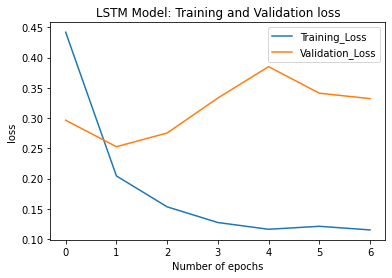

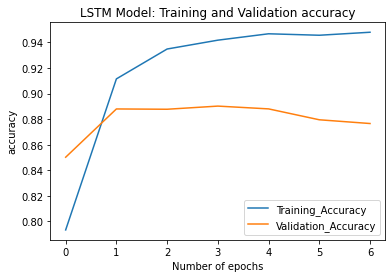

In [90]:
metrics = pd.DataFrame(history.history)

metrics.rename(columns= {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, 
               inplace = True)

def plot_graphs(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

plot_graphs('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [91]:
# Tahmin yapılması
train_pred = lstm.predict(x_train, batch_size=256)
lstm.reset_states()
test_pred = lstm.predict(x_test, batch_size=256)

In [94]:
pred=np.concatenate((train_pred,test_pred),axis=0)

In [96]:
train_score = lstm.evaluate(x_train, y_train, verbose=0)
print("Accuracy is %{}".format(train_score[1]*100))

Accuracy is %94.94999647140503


# **Multi-Class Perceptron Classification**

In [99]:
from sklearn.neural_network import MLPClassifier
X = data['text']
y = data['label']
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [101]:
test_mlp = clf.predict(x_test)

In [106]:
from sklearn.metrics import accuracy_score
print("Accuracy is ",accuracy_score(y_test, test_mlp))

Accuracy is  0.7094072164948454
